In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
#import project_code as pc
import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
#funkcja import pliku
def f_file_import(name:str):
    return pd.read_csv(name)

In [3]:
#Zaimportowanie pliku z pc
df_clean = f_file_import('df_clean.csv')

In [26]:
#definicja development
#funkcja agregująca dane do nowego DF
def aggregate_fun(df, agg_list:list, measure:str):
    agg_df = df.groupby(agg_list)[measure].agg(['count',sum,'mean', 'median']).reset_index()
    agg_df.rename(columns= {'count':'count_x', 'sum':'sum_x', 'mean':'mean_x', 'median':'median_x'}, inplace=True)
    return agg_df
    #['country','main_category'] 'usd_pledged_real'

In [5]:
#funkcja bar plot z procentami
def barplot_pct(df, lista_2_elementy:list ):
    #agregujemy po 2 zmiennych, otrzymujemy count, sum, mean, median
    df_new = aggregate_fun(df, lista_2_elementy, 'ID' )
        #['country', 'main_category']
    
    #zmieniamy nazwę w nowo utworzonym DF, bo wysypuje się na nazwach typu count
    df_new.rename(columns= {'count':'count_y', 'sum':'sum_y', 'mean':'mean_y', 'median':'median_y'}, inplace=True)

    #agregujemy drugiego DF po 1 zmiennej - będziemy brać z tego sumę
    df_new_1 = aggregate_fun(df_new, lista_2_elementy[1], 'count_y')
        #['main_category']

    #zmieniamy nazwę drugiego DF, bo wysypuje się na nazwach typu count
    df_new_1.rename(columns= {'count':'count_x', 'sum':'sum_x', 'mean':'mean_x', 'median':'median_x'}, inplace=True)

    #merge'ujemy powyższe DFy, z pierwszego bierzemy count_y, z drugiego sum_x,
    # merge jako inner join, łączenie po XXXXXX
    df_new_2 = pd.merge(df_new[[lista_2_elementy[0], lista_2_elementy[1], 'count_y']],
    df_new_1[[lista_2_elementy[1],'sum_x']], how='inner', on=lista_2_elementy[1])
        #'country','main_category'
        #'main_category' x2

    #Tworzymy nową kolumnę procent
    df_new_2['pct'] = df_new_2['count_y']/df_new_2['sum_x'] * 100

    #Odwołanie do funkcji tworzącej wykres
    bar_plot_2_var(df_new_2, lista_2_elementy[1], lista_2_elementy[0],'pct', 2,8);
        #'main_category' 'country'
    

#agg_country_main_category.rename(columns= {'count':'count_y', 'sum':'sum_y', 'mean':'mean_y', 'median':'meadian_y'}, inplace=True)
#agg_country_main_category.head()

In [6]:
#definicja development
#funkcja wykres słupkowy - liczebność - dwie zmienne - col x
def bar_plot_2_var(df, var_col:str, var_x:str, var_y:str, column_wrap:int =3, height_value:float = 4):
    g = sns.catplot(data = df, col = var_col , x = var_x, y=var_y, kind = 'bar', height = height_value, col_wrap=column_wrap, sharex = False)
    g.set_titles('{col_name}');

In [7]:
#definicja development
#funkcja wykres słupkowy - liczebność - dwie zmienne - col x
def count_plot_col(df, var1:str, var2:str,column_wrap:int =3, height_value:float = 4):
    g = sns.catplot(data = df, col = var1 , x = var2,  kind = 'count', height = height_value, col_wrap=column_wrap)
    g.set_titles('{col_name}');
    #'country' 'main_category' 'count'
    #y = measure ,

In [8]:
#funkcja 3 zmienne - po aggregujących  
def bar_plot_3_var(df, var_col:str, var_x:str, var_y:str, hue_var:str,zmienna_ilosciowa:str, palette_list:list, column_wrap:int =3, height_value:float = 4):
    df_new = aggregate_fun(df, [var_x, var_col, hue_var], zmienna_ilosciowa )
    g = sns.catplot(data = df_new, col = var_col , x = var_x, y = var_y, hue = hue_var, kind = 'bar', height = height_value, col_wrap = column_wrap, palette = palette_list, sharex = False)
    g.set_titles('{col_name}');

In [9]:
def bar_plot_2_var(df, var_col:str, var_x:str, var_y:str, column_wrap:int =3, height_value:float = 4):
    g = sns.catplot(data = df, col = var_col , x = var_x, y=var_y, kind = 'bar', height = height_value, col_wrap=column_wrap)
    g.set_titles('{col_name}');

In [10]:
#funkcja wykres słupkowy - liczebność - jedna zmienna
def bar_plot_1_var(name, group_var:str, size:tuple = (10,6)):
    name.groupby(group_var)[group_var].count().sort_values(ascending = False).plot(kind = 'bar', figsize = size);

In [11]:
#funkcja wykres słupkowy - liczebność - jedna zmienna - dla dat
def bar_plot_1_var_date(name, group_var:str, size:tuple = (10,6)):
    name.groupby(group_var)[group_var].count().plot(kind = 'bar', figsize = size);

In [12]:
#funkcja wykres słupkowy - średnia - jedna zmienna + zmienna grupowana
# var1 - zmienna grupująca, var2 - zmienna grupowana
def bar_plot_1_var_mean(df, group_var:str, groupped_var:str):
    df.groupby(group_var)[groupped_var].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,8));

In [13]:
#definicja development
#funkcja wykres słupkowy - liczebność - jedna zmienna
def f_barplot_1_var(name, var:str, size:tuple = (10,6)):
    name.groupby(var)[var].count().sort_values(ascending = False).plot(kind = 'bar', figsize = size);

In [14]:
#definicja development
#funkcja agregująca dane do nowego DF
def aggregate_fun(df, agg_list:list, measure:str):
    agg_df = df.groupby(agg_list)[measure].agg(['count',sum,'mean']).reset_index()
    return agg_df
    #['country','main_category'] 'usd_pledged_real'

In [15]:
#definicja development
#funkcja sortująca
def sorting_values(df_agg, value_by:str = 'mean', sorting_var:bool = False):
    return df_agg.sort_values(by =value_by, ascending= sorting_var).reset_index()

In [16]:
#definicja development
#funkcja wykres słupkowy - liczebność - dwie zmienne - col x
def barplot_2var(df, var1:str, var2:str, measure, height_value:float = 4):
    sns.catplot(data = df, col = var1 , x = var2, y = measure , kind = 'bar', height = height_value);
    #'country' 'main_category' 'count'

In [17]:
#definicja development
#funkcja wykres słupkowy - średnia - dwie zmienne
# var1 - zmienna grupująca, var2 - zmienna grupowana
def f_barplot_2_var_mean(name, var1:str, var2:str, size:tuple = (10,6)):
    name.groupby(var1)[var2].mean().sort_values(ascending=False).plot(kind='bar', figsize = size);

In [18]:
#funkcja filtrująca - 
#df_zadana_kwota = df_clean.query('usd_goal_real < 10000')
def filter_lower_equal(df, x, var_bar_plot:list):
    
    df_zadana_kwota = df[df.usd_goal_real <= x]
    g = barplot_pct(df_zadana_kwota, var_bar_plot)
    #var_bar_plot = ['state','main_category']

In [19]:
#funkcja tworząca liste unikalnych wartości do widgetów
def unique_value_list(df, col_var:str):
    return list(df[col_var].unique())

In [20]:
#funkcja tworząca liste unikalnych wartości do widgetów sortująca 
def unique_value_list_sorted(df, col_var:str):
    return sorted(list(df[col_var].unique()))
    

In [21]:
#funkcja definicja widgetu 
def widget_def(lista:list, descr:str ):
    return widgets.SelectMultiple(
    options=lista,
    value=[lista[0]],
    rows=10,
    description=descr,
    disabled=False)

In [42]:
def widget_layout(widget1, widget2):
    layout = widgets.Layout(display='flex',
         flex_flow='row',
         border='solid green',
         width='100%')
    return widgets.Box(children=[widget1, widget2], layout=layout)

In [37]:
#tworzymy listy
list_main_cat = unique_value_list(df_clean, 'main_category')
list_country = unique_value_list(df_clean, 'country')
list_launched_year = unique_value_list_sorted(df_clean, 'launched_year')

In [38]:
# widgety
widget_main_cat = widget_def(list_main_cat, 'Kategoria')
widget_country = widget_def(list_country, 'Kraj' )
widget_launched_year = widget_def(list_launched_year, 'Rok uruchomienia zbiórki' )

# W którym kraju jaka kategoria jest najbardziej popularna i dochodowa

In [ ]:
#potrzebne zmienne:
"""
country
main_category
zagregowana tabela z liczebnościami, procentami, średnią i medianą dla usd_goal_real oraz usd_pledged_real
"""
#potrzebne funkcje
    """
    #popularność:
    + wykres country od main_category - liczebności i procenty
    + wykres country od state - liczebność i procenty
    #dochodowość:
    + agregująca
    + wykres country od main_category i state - średnia i mediana dla usd_goal_real oraz usd_pledged_real
    """

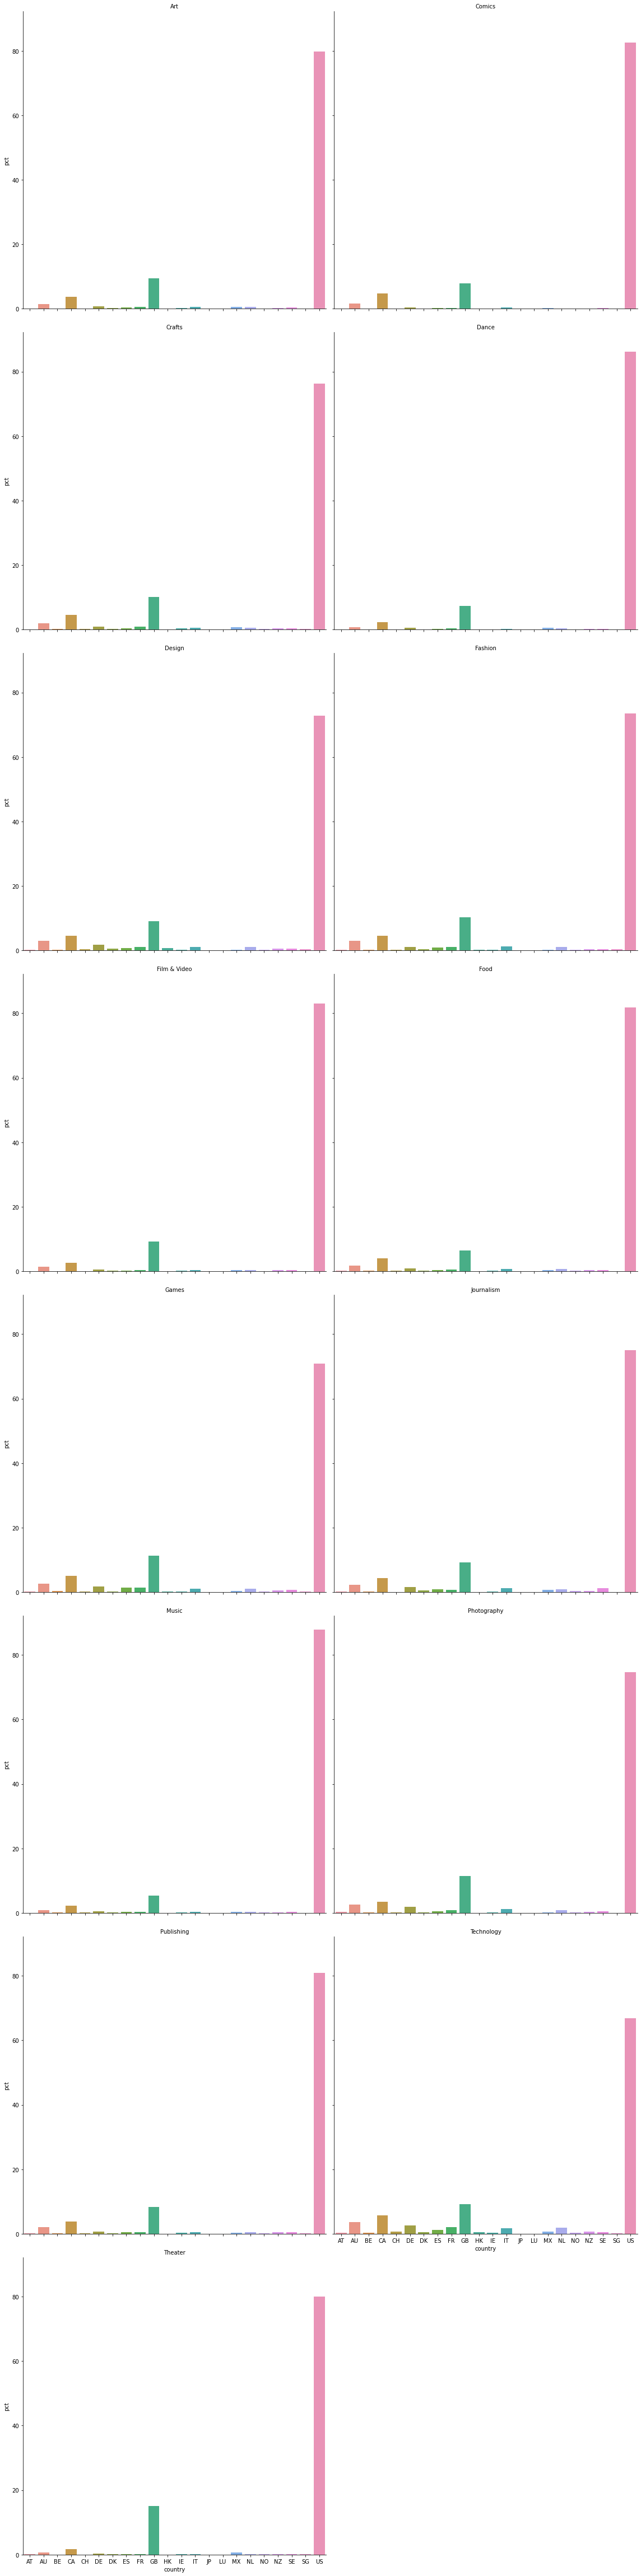

In [33]:
country_main_category_barplot_pct = barplot_pct(df_clean,['country', 'main_category'])

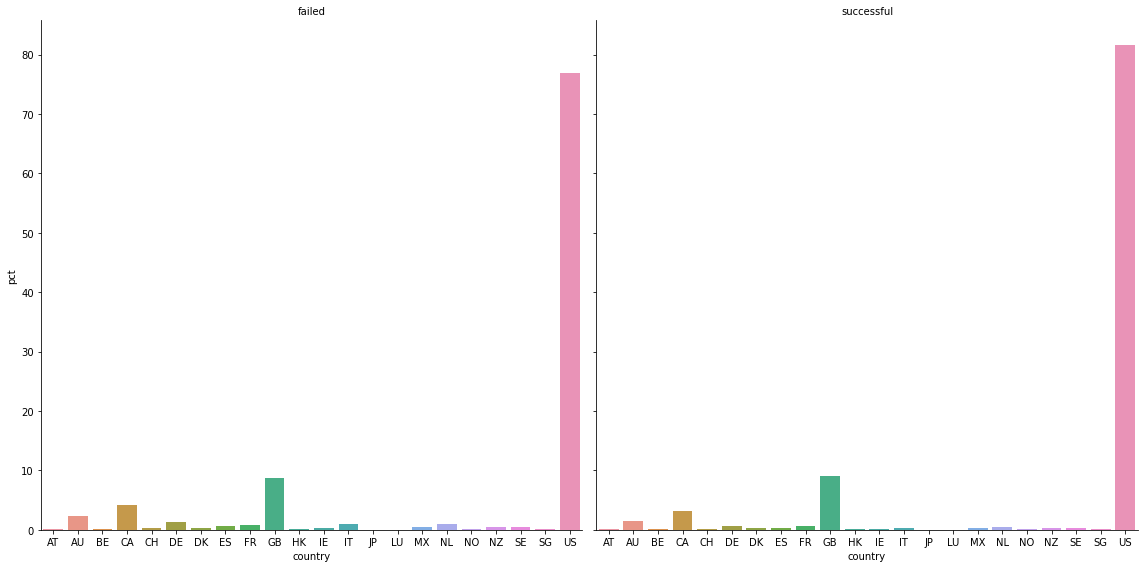

In [64]:
country_state_barplot_pct = barplot_pct(df_clean,['country', 'state'])

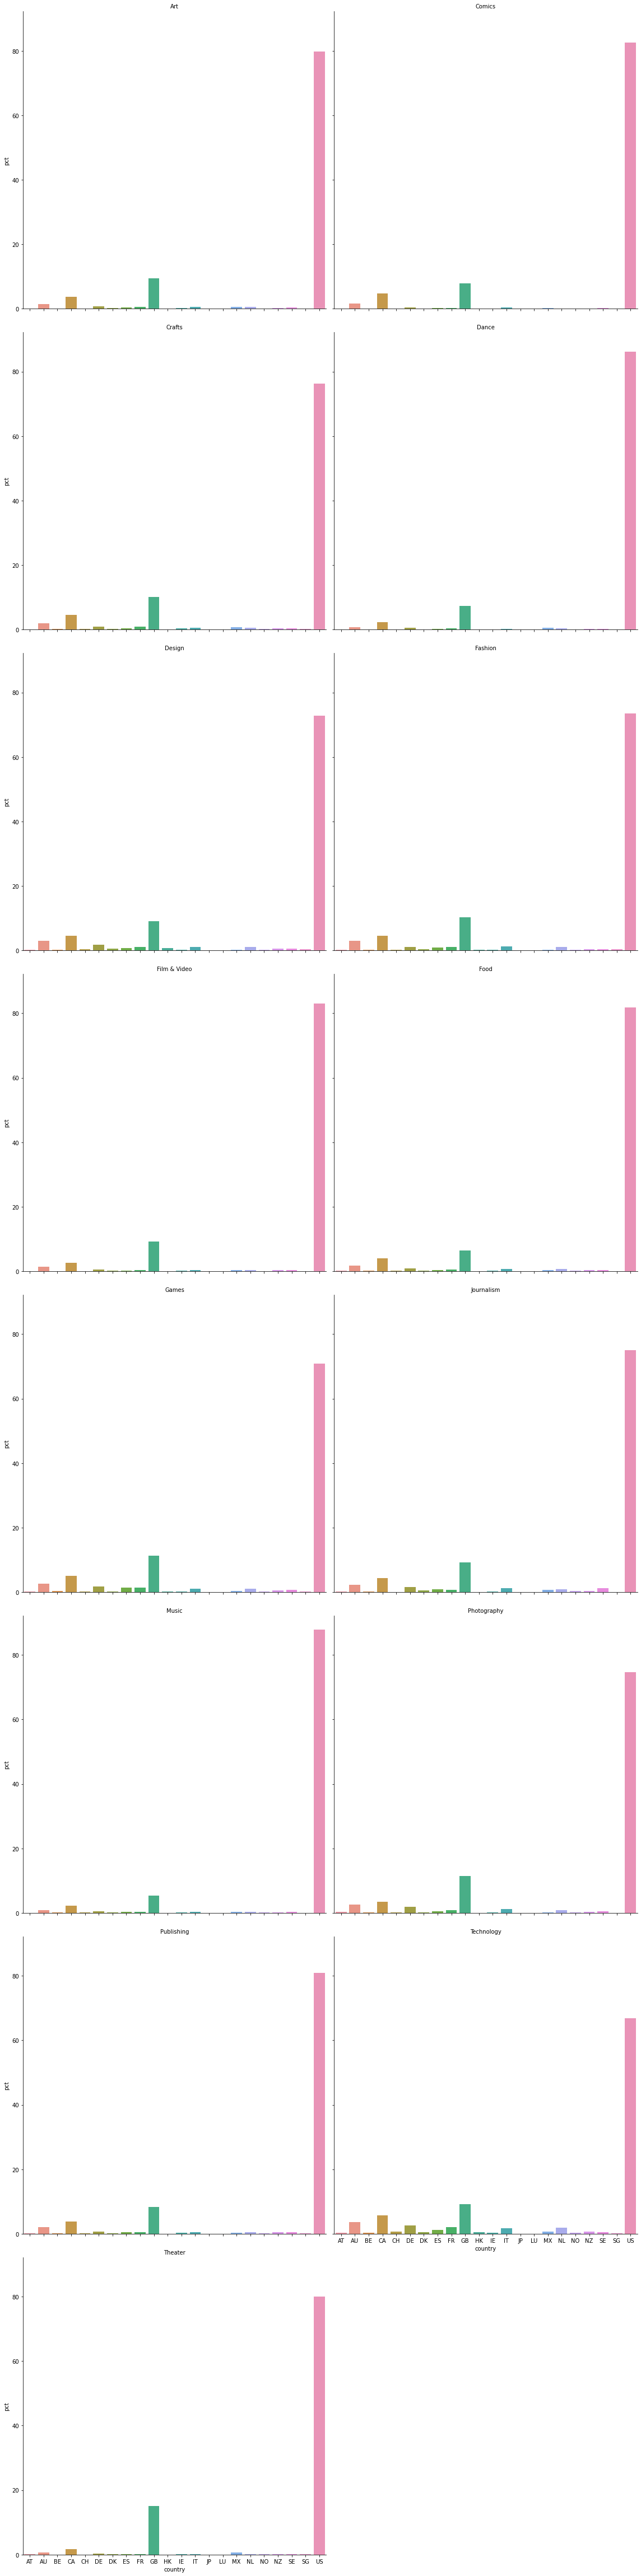

In [51]:
bar_plot(agg_country_main_category, 'main_category', 'country','pct', 2,8)

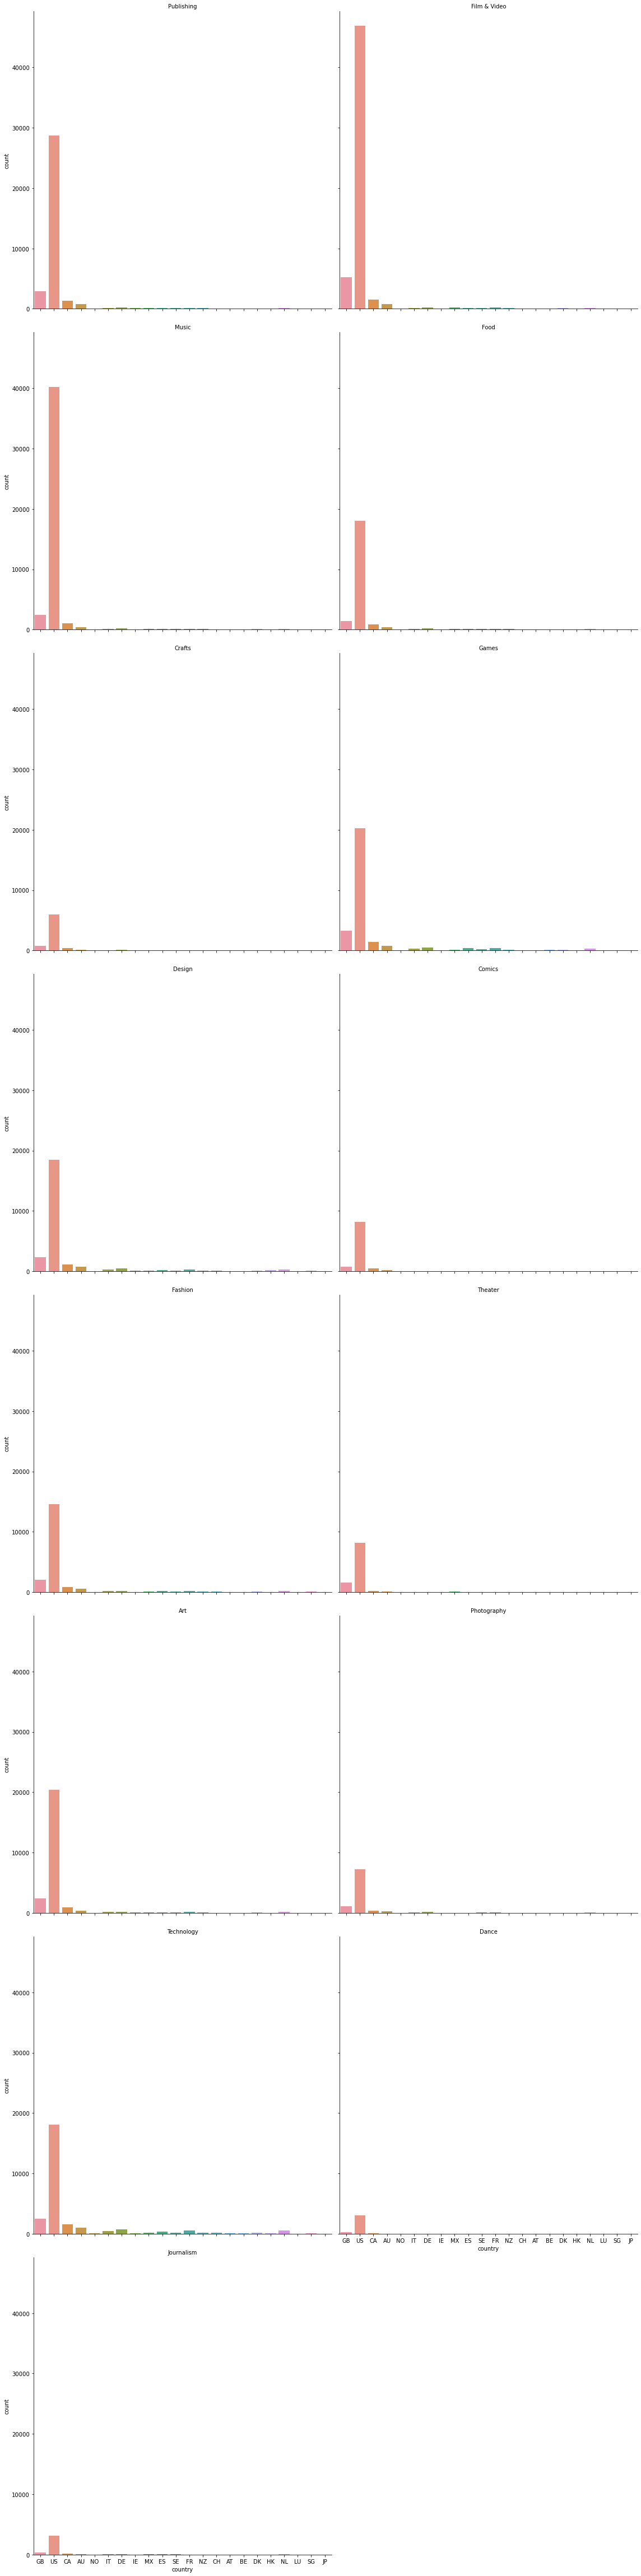

In [16]:
#Tak wyglądają wszystkie wykresy
country_main_category = barplot_2var(df_clean, 'main_category', 'country', 2,8)

In [25]:
widget_maincat_country = widget_layout(widget_main_cat, widget_country)
widget_maincat_country

Box(children=(SelectMultiple(description='Kategoria', index=(0,), options=('Publishing', 'Film & Video', 'Musi…

In [ ]:
#Do dorobienia button

In [36]:
"""
#agregujemy country od main_category i state
agg_country_main_cat_state = aggregate_fun(df_clean, ['country','main_category','state'], 'ID' )
#zapis zamiast notacji wykładniczej:
pd.set_option('display.float_format', '{:.2f}'.format)
agg_country_main_cat_state
"""

,country,main_category,state,count,sum,mean
0,AT,Art,failed,24,23104308257,962679510.71
1,AT,Art,successful,5,4288096162,857619232.40
2,AT,Comics,failed,3,3028110971,1009370323.67
3,AT,Comics,successful,3,4593229294,1531076431.33
4,AT,Crafts,failed,8,10645838527,1330729815.88
...,...,...,...,...,...,...
607,US,Publishing,successful,9965,10761196732877,1079899320.91
608,US,Technology,failed,13335,14381143651778,1078450967.51
609,US,Technology,successful,4723,5021400321169,1063180250.09
610,US,Theater,failed,2973,3204053631894,1077717333.30


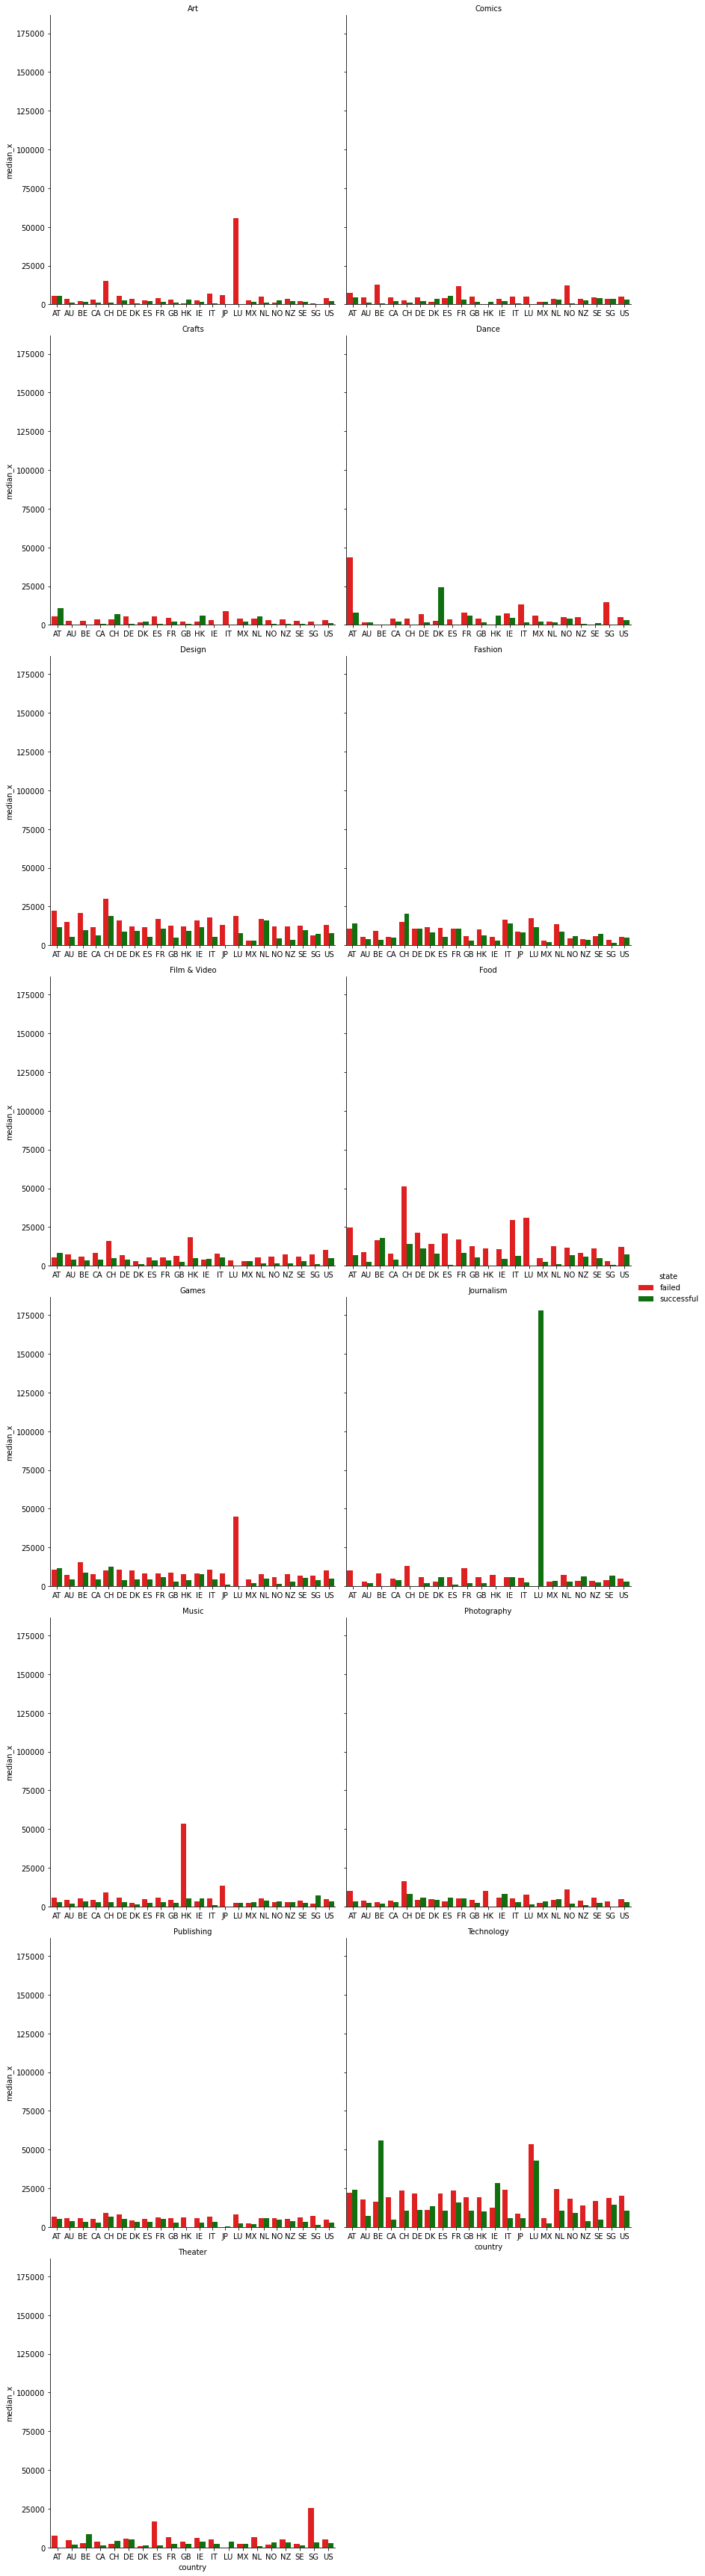

In [28]:
bar_plot3 = bar_plot_3_var(df_clean, var_col = 'main_category', var_x = 'country', var_y = 'median_x', hue_var = 'state',zmienna_ilosciowa = 'usd_goal_real', palette_list = ['r', 'g'],column_wrap =2, height_value = 6)


In [36]:
widget_maincat_country = widget_layout(widget_main_cat, widget_country)
widget_maincat_country

Box(children=(SelectMultiple(description='Kategoria', index=(7,), options=('Publishing', 'Film & Video', 'Musi…

Button(description='Odśwież', style=ButtonStyle())

Output()

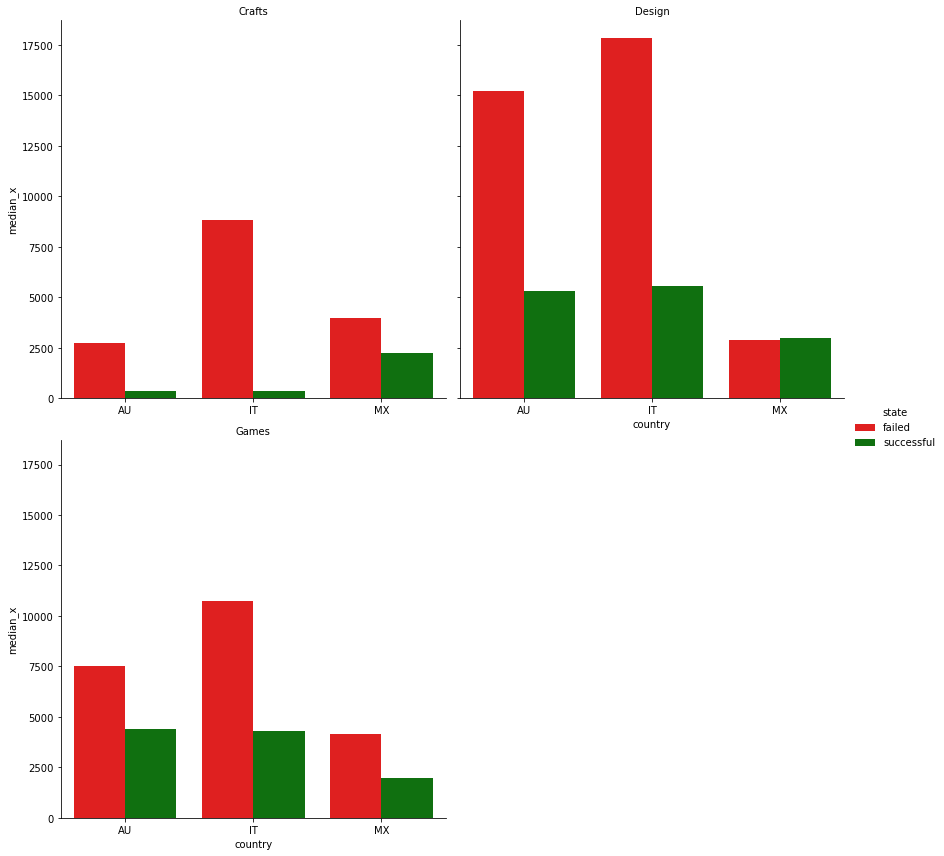

In [35]:

refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(widget_main_cat.value)
    #tworzę listę wybranych lat
    list_wdg_country = list(widget_country.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category) ) & ( df_clean['country'].isin(list_wdg_country) )]
    #Tworzę wykres na podstawie nowego DF
    return bar_plot_3_var(df_new, var_col = 'main_category', var_x = 'country', var_y = 'median_x', hue_var = 'state',zmienna_ilosciowa = 'usd_goal_real', palette_list = ['r', 'g'],column_wrap =2, height_value = 6)

display(refresh_button, output)
refresh_button.on_click(refresh)

# wzrost popularności rok po roku/miesiąc po miesiącu

In [ ]:
#potrzebne zmienne:
"""
rok i miesiąc launched
(kwartał launched)
zagregowana tabela z liczebnościami, YoY
"""
#potrzebne funkcje
    """
    + agregująca
    + wykres rok/miesiąc (kwartał) liczebności
    + wykres rok/miesiąc w kontekście innej zmiennej, przykładowo main_category
    - wykres zmian procentowych rok do roku/miesiąc do miesiąca(/kwartał do kwartału)
    """

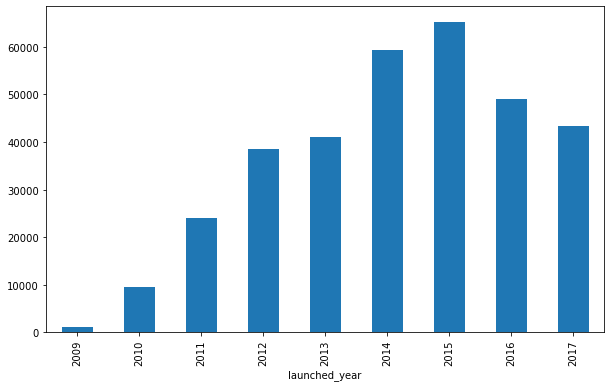

In [68]:
#Ten wykres tak zostawiamy
year_count = bar_plot_1_var_date(df_clean, 'launched_year')

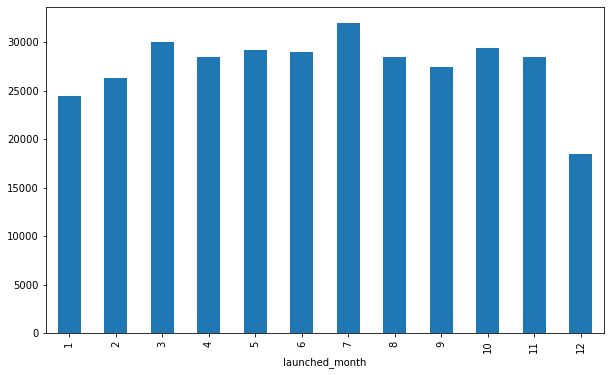

In [69]:
#Ten wykres tak zostawiamy
year_count = bar_plot_1_var_date(df_clean, 'launched_month')

In [41]:
#Widget do poniższych wykresów
widget_layout(widget_main_cat, widget_launched_year)

Box(children=(SelectMultiple(description='Kategoria', index=(0,), options=('Publishing', 'Film & Video', 'Musi…

In [ ]:
#Tu powinien być button

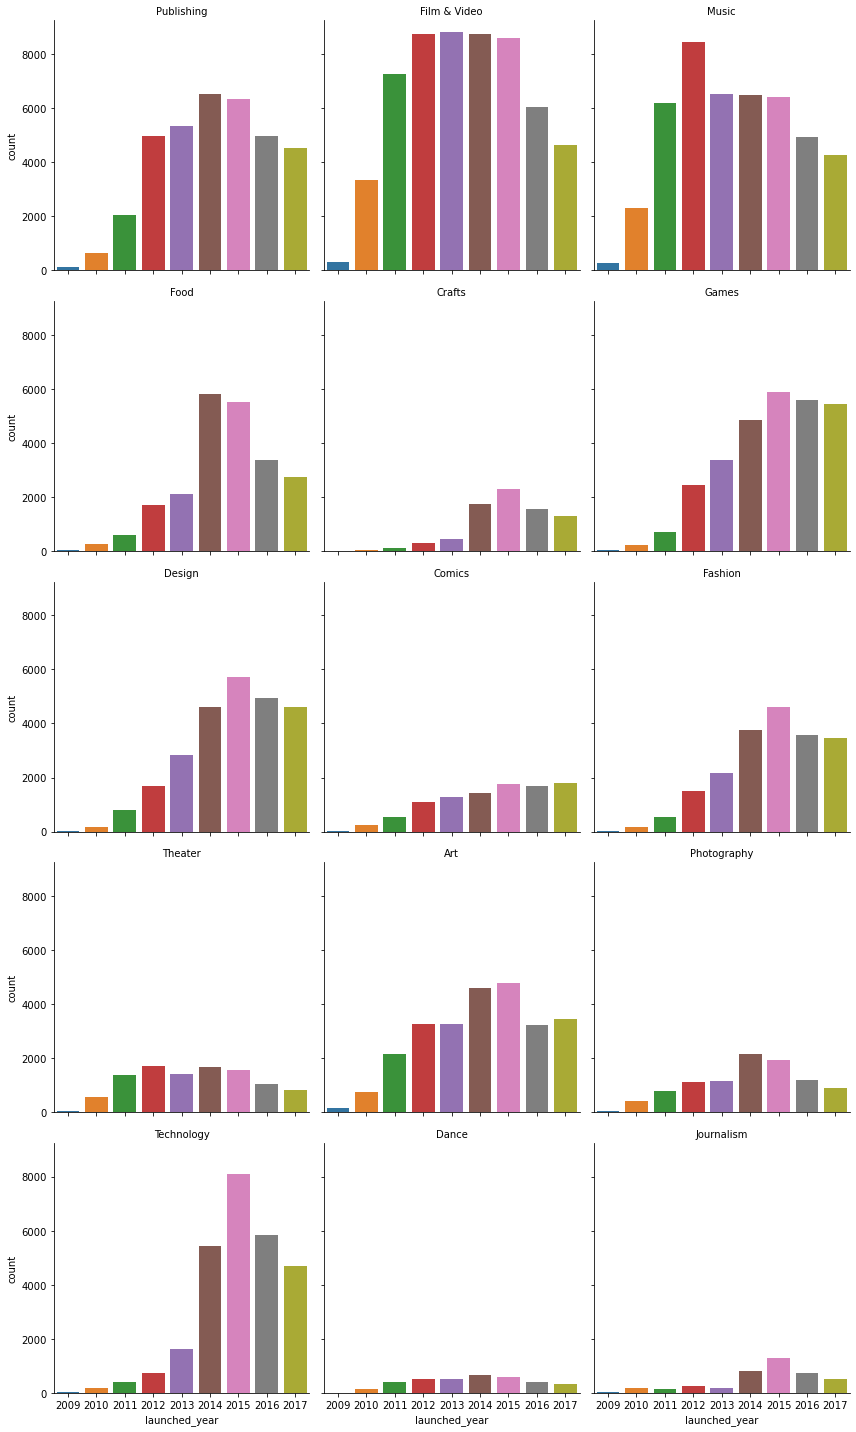

In [72]:
#Tak wyglądają wszystkie wykresy
year_main_category_count = count_plot_col(df_clean, 'main_category', 'launched_year')

# ile średnio wpłacała jednostka per kategoria/podkategoria

In [ ]:
#potrzebne zmienne:
"""
main_category
średnia usd_pledged_real
"""
#potrzebne funkcje
    """
    + wykres średniej kwoty na kategorie
    """

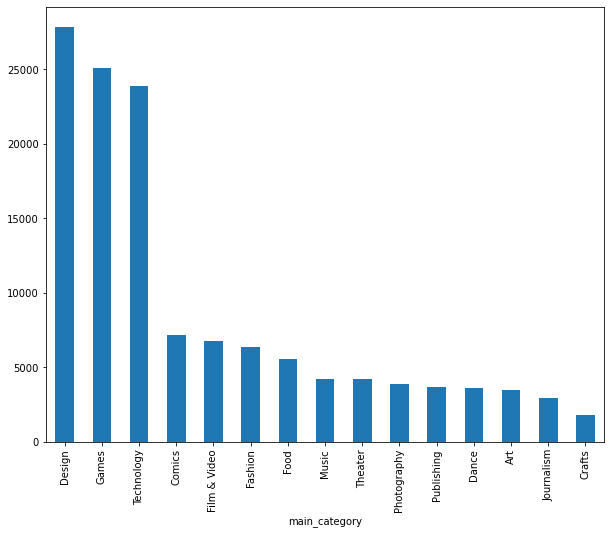

In [74]:
#Ten wykres tak zostawiamy
main_category_usd_pledged_real_mean = bar_plot_1_var_mean(df_clean, 'main_category', 'usd_pledged_real')

***

### Kraje

In [43]:
#widget do poniższego wykresu
widget_country

SelectMultiple(description='Kraj', index=(0,), options=('GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', …

Button(description='Odśwież', style=ButtonStyle())

Output()

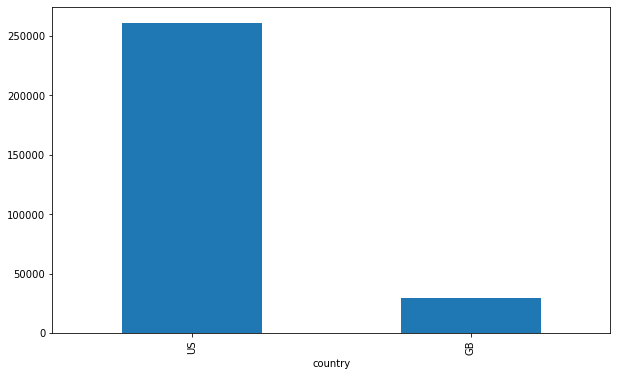

In [45]:

refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(widget_country.value)
    #tworzę listę wybranych lat
    #list_wdg_launched_year = list(wdg_year_main_category_count__launched_year.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['country'].isin(list_wdg_main_category) )] #& ( df_clean['launched_year'].isin(list_wdg_launched_year) )]
    #Tworzę wykres na podstawie nowego DF
    return f_barplot_1_var(df_new, 'country')

display(refresh_button, output)
refresh_button.on_click(refresh)

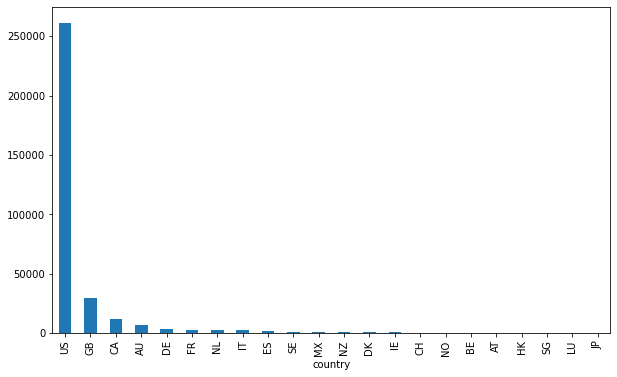

In [51]:
country_count = f_barplot_1_var(df_clean, 'country')

### Kategoria Główna

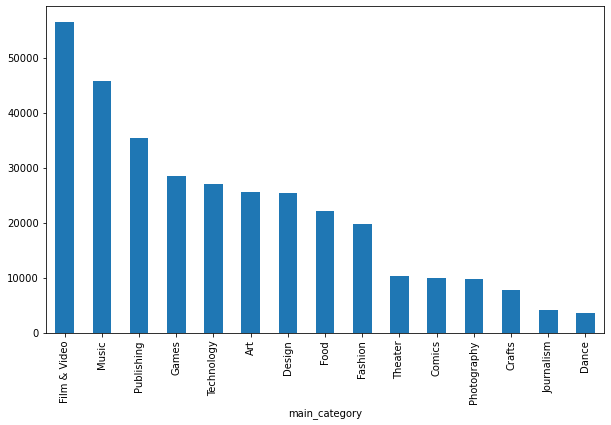

In [52]:
#Ten wykres tak zostaje
main_category_count = f_barplot_1_var(df_clean, 'main_category')

### Statusy

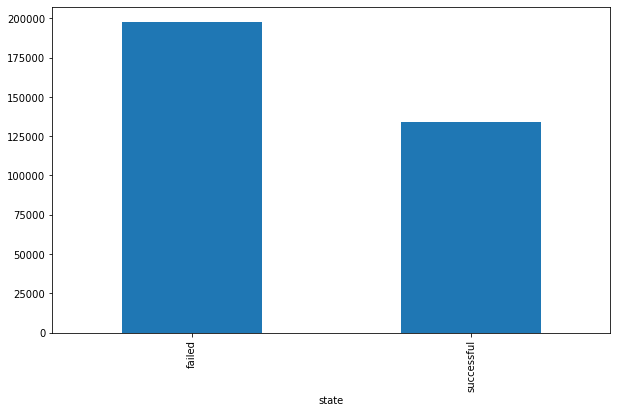

In [53]:
#Ten wykres tak zostaje - zmienimy kolory
state_count = f_barplot_1_var(df_clean, 'state')

In [48]:
country_state_usd_goal_real_df = aggregate_fun(df_clean, ['country', 'state'], 'usd_goal_real')

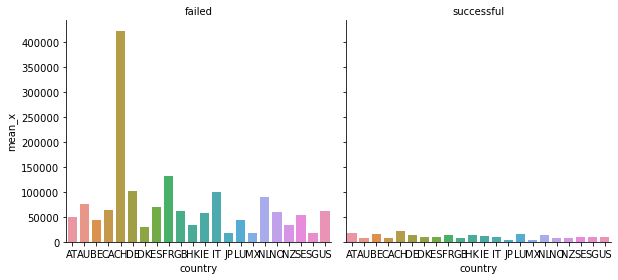

In [50]:

#to ląduje pod wykresem country, state, liczebność

#średnia kwota celu w poszczególnych krajach w podziale na udane i nieudane projekty
bar_plot_2_var(country_state_usd_goal_real_df, 'state', 'country', 'mean_x', 8)

In [51]:
#widget do powyższego
widget_country

SelectMultiple(description='Kraj', index=(0, 1), options=('GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX'…

In [ ]:
#Tu powinien być button do powyższego

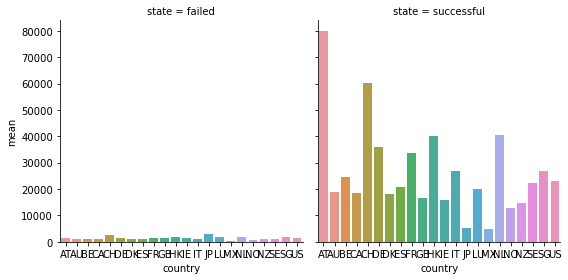

In [55]:
#średnia uzbierana kwota w poszczególnych krajach w podziale na udane i nieudane projekty
barplot_2var(country_state_usd_pledged_real_df, 'state', 'country', 'mean')

## czy małe projekty (kwotowo) łatwiej odnoszą sukces

In [ ]:
#potrzebne zmienne:
"""
'state'
'usd_goal_real'
'main_category'

"""
#potrzebne funkcje
    """
    + użytkownik podaje kwotę i mu wyskakuję skuteczność/ile było success i fail zbiórek 
    
    """

C:\Users\jozab\anaconda3\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


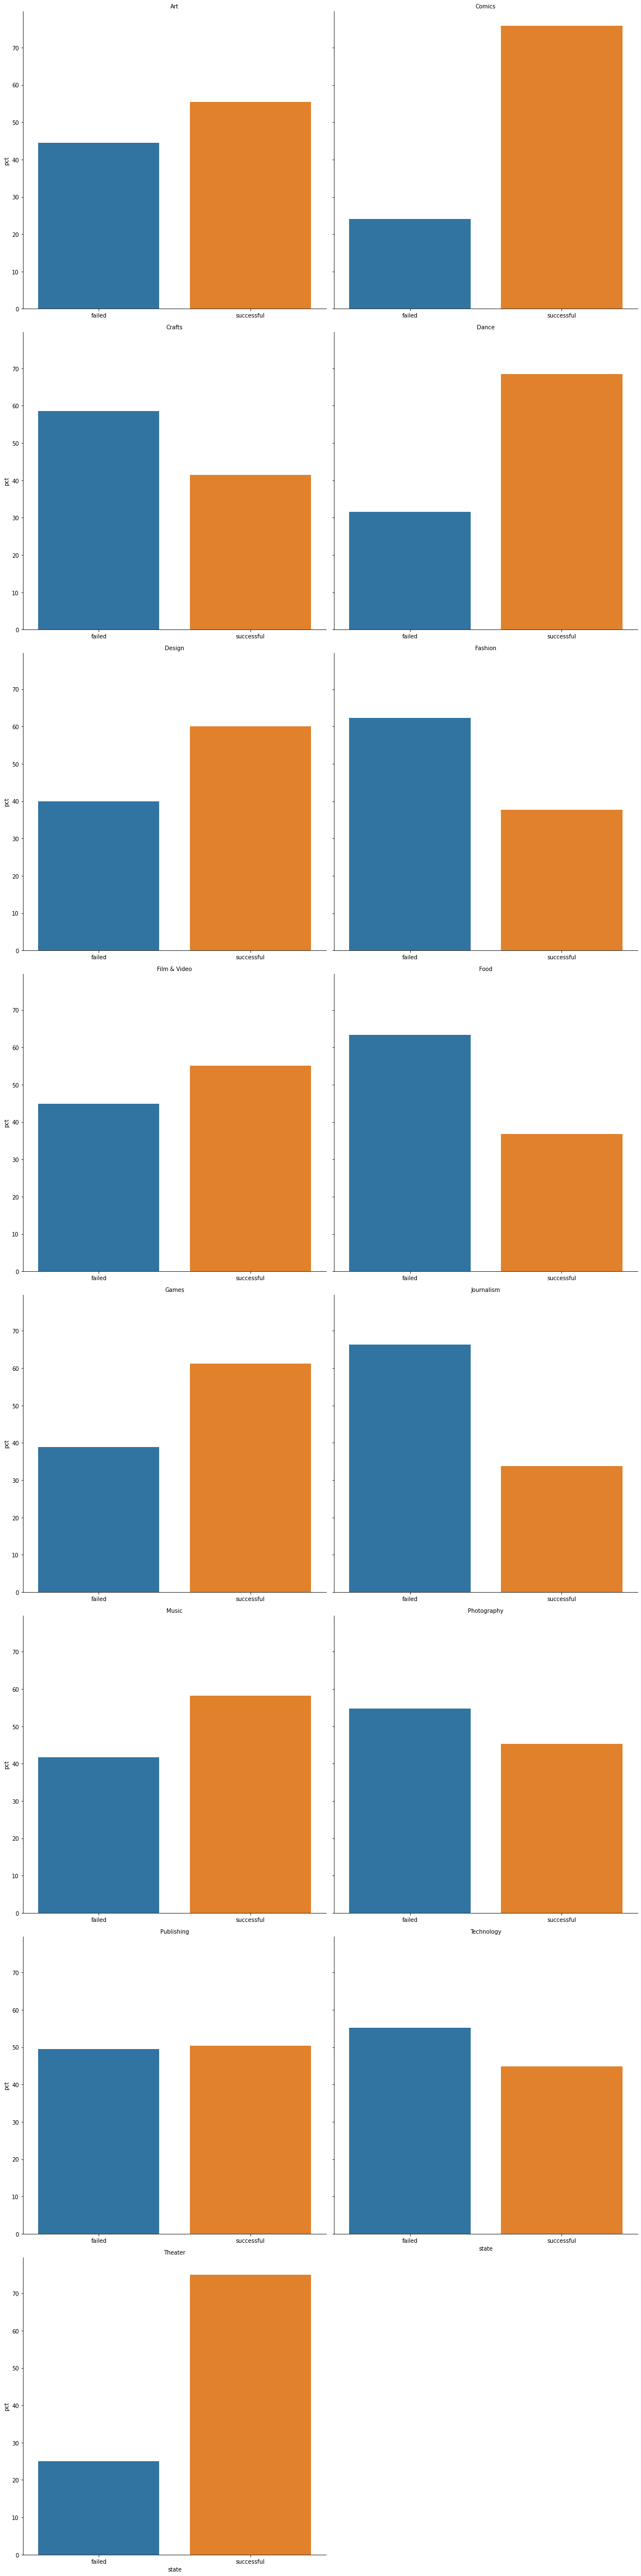

In [44]:
#Tu trzeba dorobić widget (wpisanie kwoty z palca)
da = filter_lower_equal(df_clean, 1000, ['state','main_category'])

# jaki był czas zbiórki dla każdej kategorii - czy uzbierano na cel

In [ ]:
#potrzebne zmienne:
"""
'state'
'main_category'
'duration'


"""
#potrzebne funkcje
    """
    + użytkownik podaje liczbę dni i dostaje wykres % ile było failed i succsessful
    
    """
    

In [70]:
agg_cat_dur_state = aggregate_fun(df_dur, ['main_category','duration','state'], 'ID')
agg_cat_dur_state

,main_category,duration,state,count,sum,mean,median
0,Art,1,failed,5,7302978204,1460595640.80,1423239824.00
1,Art,1,successful,10,11287087525,1128708752.50,1055764573.50
2,Art,2,failed,5,4794939250,958987850.00,972092973.00
3,Art,2,successful,5,2824200521,564840104.20,701211028.00
4,Art,3,failed,21,20863855252,993516916.76,924870285.00
...,...,...,...,...,...,...,...
1777,Theater,58,successful,12,13754932923,1146244410.25,1187699078.50
1778,Theater,59,failed,26,29612939163,1138959198.58,1240710134.50
1779,Theater,59,successful,30,37384236243,1246141208.10,1306031130.50
1780,Theater,60,failed,466,488258442012,1047764897.02,1030120020.50


In [72]:
#zmieniamy nazwy bo wywala blad
agg_cat_dur_state.rename(columns= {'count':'count_y', 'sum':'sum_y', 'mean':'mean_y', 'median':'median_y'}, inplace=True)

C:\Users\jozab\anaconda3\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


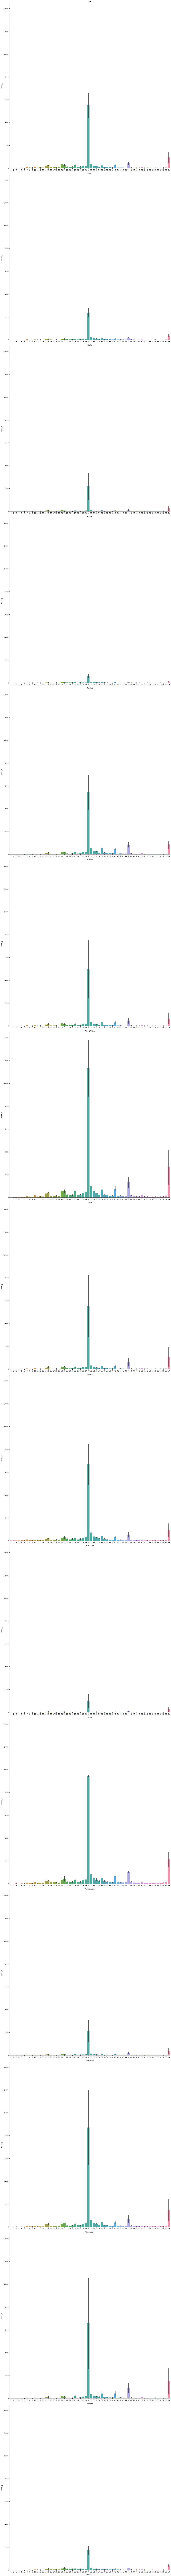

In [77]:

duration_cat_state = bar_plot_2_var(agg_cat_dur_state, 'main_category', 'duration', 'count_y', column_wrap=1, height_value=15)

In [68]:
#zmieniamy na 60 dni bo w 2011 zmienili czas z 90 dni na 60 dni
#df_clean.duration = df_clean['duration'].str.replace('days', ' ').astype('int')

AttributeError: Can only use .str accessor with string values!

In [69]:
df_dur = df_clean[df_clean['duration']<=60]
df_dur

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,launched_month,launched_year,launched_date,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.00,1533.95,8,2015,2015-08-11,59
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.00,30000.00,9,2017,2017-09-02,60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.00,45000.00,1,2013,2013-01-12,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.00,5000.00,3,2012,2012-03-17,30
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.00,50000.00,2,2016,2016-02-26,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331460,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,2017-04-19,2017-03-20 22:08:22,failed,4,US,154.00,6500.00,3,2017,2017-03-20,30
331461,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,2011-06-22 03:35:14,failed,5,US,155.00,1500.00,6,2011,2011-06-22,27
331462,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,2010-07-01 19:40:30,failed,1,US,20.00,15000.00,7,2010,2010-07-01,46
331463,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,2016-01-13 18:13:53,failed,6,US,200.00,15000.00,1,2016,2016-01-13,31
